In this lab, you should try to implement some of the techniques discussed in the lecture.
Here is a list of reasonable tasks.

Must implement:
 * Log-loss
 
Easy:
 * L1 and L2 regularization (you can choose one)
 * momentum, Nesterov's momentum (you can choose one)

Medium difficulty:
 * Adagrad, RMSProp (you can shoose one) - not much harder than momentum, really
 * dropout

Hard (and time-consuming):
 * batch-normalization

Try to test your network to see if these changes improve accuracy. They improve accuracy much more if you increase the layer size, and if you add more layers, say 1 or 2.

In [74]:
import random
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import timeit
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Epoch 0: 0.3497


Epoch 10: 0.9671


Epoch 20: 0.972


Epoch 30: 0.9705


Epoch 40: 0.9683


Epoch 50: 0.9699


Epoch 60: 0.9706


Epoch 70: 0.9686


Epoch 80: 0.9695


Epoch 90: 0.9698


Epoch 99: 0.9693
Time since import: 0:01:30.830236


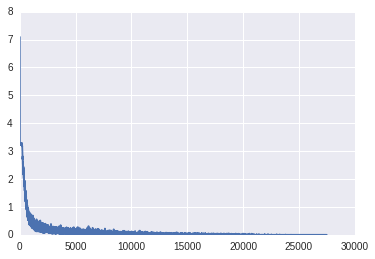

In [351]:
%matplotlib inline

import net_batch
reload(net_batch)

opt = net_batch.TrivialGD(.5)
opt = net_batch.Momentum(rate=1.)
opt = net_batch.NesterovMomentum(rate=1.5)
opt = net_batch.RMSProp(rate=.003)
network = net_batch.Network([784,60,60,10], [0., 0., 0.], opt)
network.SGD(mnist.train, epochs=100, mini_batch_size=200, test_data=mnist.test)
# network.SGD(mnist.train, epochs=30, mini_batch_size=200, test_data=mnist.test) #Gave 0.96

Epoch 0: 0.1001


Epoch 5: 0.1034
Time since import: 0:00:04.527125


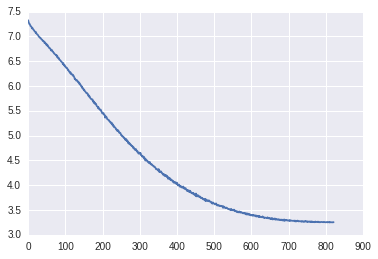

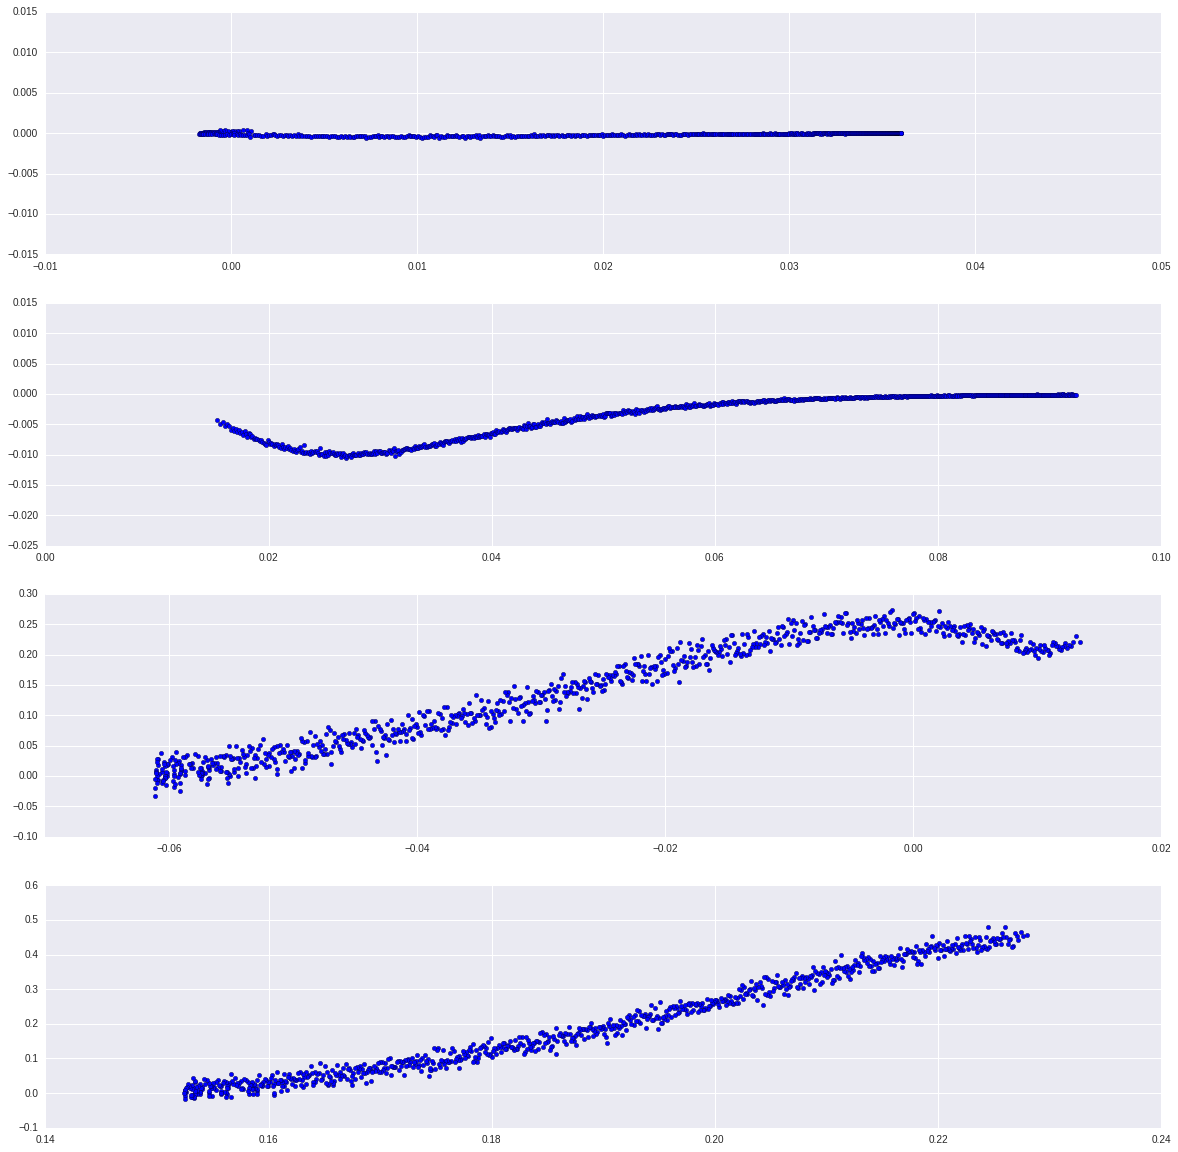

In [405]:
%matplotlib inline

import net_batch
reload(net_batch)

opt = net_batch.RMSPropVarWatch(rate=.0001)
network = net_batch.Network([784,30,10], [0., 0.], opt)
network.SGD(mnist.train, epochs=6, mini_batch_size=400, test_data=mnist.test)
opt.plt()

Epoch 0: 0.9522


Epoch 4: 0.9521
Time since import: 0:03:13.633864


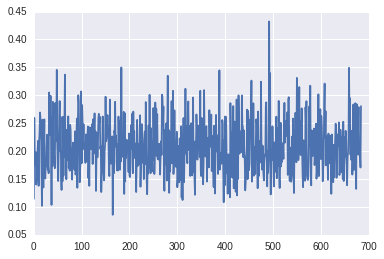

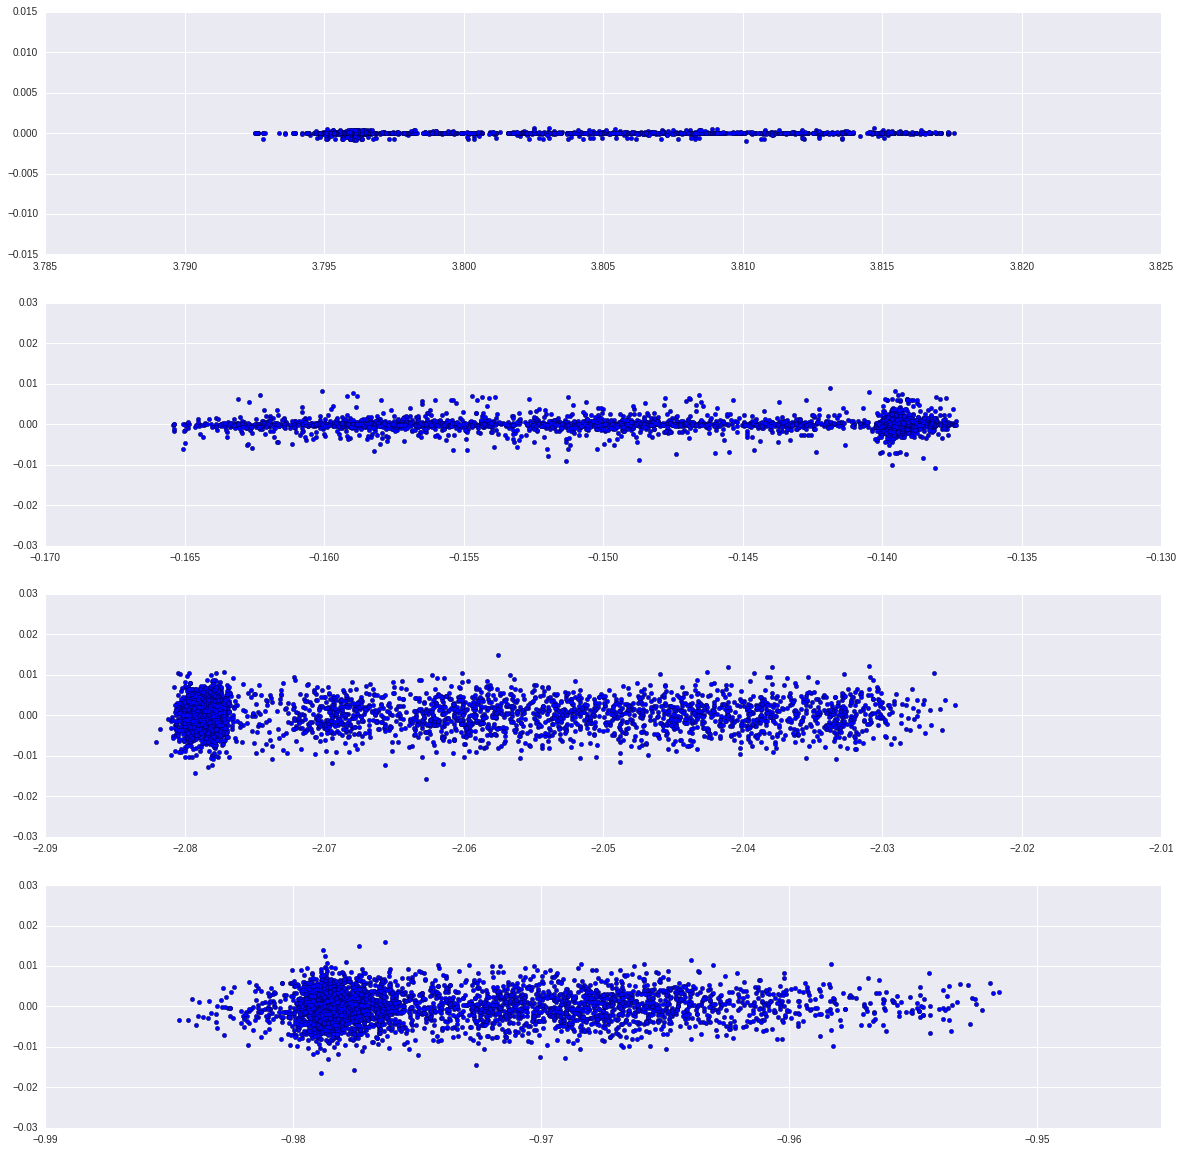

In [419]:
network.net.optimizer.rate=0.0001
network.SGD(mnist.train, epochs=5, mini_batch_size=400, test_data=mnist.test)
network.net.optimizer.plt()